In [1]:
# Libraries
import csv
import pandas as pd
import matplotlib.pyplot as plt
import math

# Read in data
#Cloud_Sections
cs = pd.read_csv('CLOUD_SECTIONS_Cleaned.csv', delimiter = ',', encoding = 'latin1')
#Designed_Pipe_Center
desP = pd.read_csv('DESIGNED_Pipe_Centers_Cleaned.csv', delimiter = ',', encoding = 'latin1')
#Planes_Local_Global_Cleaned
p_info = pd.read_csv('Planes_Local_Global_Cleaned.csv', delimiter = ',', encoding = 'latin1')

In [2]:
SectionedList = []
XsecList = []
YsecList = []
for s in range(cs.Section.nunique()): #creates a List of dataframes where each dataframe is a section
    SectionedList.append(cs[cs["Section"] == "Section-{" + str(s) + "}"])

for s in SectionedList: #for Section in SectionList, s is a dataframe for a section
    x = s.X
    y = s.Y
    XsecList.append(list(x))
    YsecList.append(list(y))
    #print(s)
    #plt.hist(s.X, bins=8, color = "orange")
    #print("Histogram of x values")
    #plt.show()
    #print(s.X)
   
    #plt.scatter(x, y)
    #plt.show()

In [3]:
#create list showing the pipe centers
CenterList = []
for n in range(desP.Section.nunique()): #creates a List of dataframes where each dataframe is a section
    CenterList.append(desP[desP["Section"] == "Section-{" + str(n) + "}"])

#print(CenterList[1])

In [4]:
TuplePairsBySection = []
for i, j in zip(XsecList, YsecList):
    TuplePairsBySection.append(list(zip(i, j)))
count = 0
#Visualize Sections
"""for C in TuplePairsBySection:
    if count == 1:
        plt.title("Section " + str(count))
        plt.xlim(0, max(x[0] for x in C) * 1.1)
        plt.ylim(0, max(y[1] for y in C) * 1.1)
        plt.scatter(*zip(*C))
        plt.scatter(CenterList[count].X, CenterList[count].Y, color = "red")
        #a = plt.Circle((CenterList[count].iloc[0,1],CenterList[count].iloc[0,2]),radius = CenterList[count].iloc[0,4]*1.05,color = "red")
        #plt.gca().add_artist(a)
        #b = plt.Circle((CenterList[count].iloc[1,1],CenterList[count].iloc[1,2]),radius = CenterList[count].iloc[1,4]*1.05,color = "red")
        #plt.gca().add_artist(b)
        plt.show()
    count += 1
    if count > 1:
        break
print(CenterList[1])
print(sorted(TuplePairsBySection[1]))
"""

'for C in TuplePairsBySection:\n    if count == 1:\n        plt.title("Section " + str(count))\n        plt.xlim(0, max(x[0] for x in C) * 1.1)\n        plt.ylim(0, max(y[1] for y in C) * 1.1)\n        plt.scatter(*zip(*C))\n        plt.scatter(CenterList[count].X, CenterList[count].Y, color = "red")\n        #a = plt.Circle((CenterList[count].iloc[0,1],CenterList[count].iloc[0,2]),radius = CenterList[count].iloc[0,4]*1.05,color = "red")\n        #plt.gca().add_artist(a)\n        #b = plt.Circle((CenterList[count].iloc[1,1],CenterList[count].iloc[1,2]),radius = CenterList[count].iloc[1,4]*1.05,color = "red")\n        #plt.gca().add_artist(b)\n        plt.show()\n    count += 1\n    if count > 1:\n        break\nprint(CenterList[1])\nprint(sorted(TuplePairsBySection[1]))\n'

In [9]:
N = 1.15 #Radius multiplier, 1.15 = 15% greater than the known radius

PassesFirstNoiseTestBySection = []
count1 = 0 
for C in TuplePairsBySection:
    #print("Section " + str(count1))
    D = [] #List used to add ordered pairs if conditions are met, replaces C
    E = [] #List used to add ordered pairs if conditions are met, replaces C
    r1 = CenterList[count1].iloc[0,4] * N #radius 1
    r2 = CenterList[count1].iloc[1,4] * N #radius 2
    c1 = tuple(CenterList[count1].iloc[0,1:3]) #Center 1
    c2 = tuple(CenterList[count1].iloc[1,1:3]) #center 2
    count2 = 0
    for op in C:
        #print("Tuple #" + str(count2) + " " + str(op))
        count2 += 1
        if math.dist(c1, op) < r1:
            D.append(op)
            continue
        if math.dist(c2, op) < r2:
            E.append(op)
            continue
        #print(str(op) + " did not pass")
    PassesFirstNoiseTestBySection.append(D) #adds cleaned section back to list
    PassesFirstNoiseTestBySection.append(E) #adds cleaned section back to list
    """plt.title("Section " + str(count1))
    plt.xlim(0, max(x[0] for x in D) * 1.1)
    plt.ylim(0, max(y[1] for y in D) * 1.1)
    plt.scatter(*zip(*D))
    plt.scatter(CenterList[count1].X, CenterList[count1].Y, color = "red")
    plt.show()"""
    count1 += 1
    #print("")

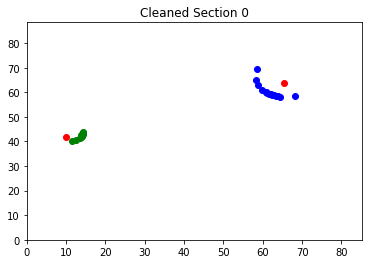

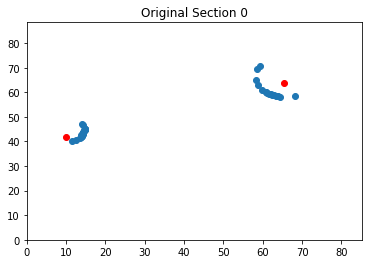

In [11]:
#CHECK FIRST TEST SUCCESS
NUM = 0
#print("With radius multiplier of " + str(N))

#Cleaned Section
plt.title("Cleaned Section " + str(NUM))
plt.xlim(0, max(x[0] for x in TuplePairsBySection[NUM]) * 1.25)
plt.ylim(0, max(y[1] for y in TuplePairsBySection[NUM]) * 1.25)
if len(PassesFirstNoiseTestBySection[2 * NUM]) > 0: #Section 1 circle 3 workaround
    plt.scatter(*zip(*PassesFirstNoiseTestBySection[2 * NUM]), color = "blue") #Circle saved as D
else: 
    print("Circle " + str(2 * NUM) + " from Section " + str(NUM) + " has no values at radius multiplier " + str(N) +".")
if len(PassesFirstNoiseTestBySection[2 * NUM + 1]) > 0: #Section 1 circle 3 workaround
    plt.scatter(*zip(*PassesFirstNoiseTestBySection[2 * NUM + 1]), color = "green")  #Circle saved as E
else: 
    print("Circle " + str(2 * NUM + 1) + " from Section " + str(NUM) + " has no values at radius multiplier " + str(N) +".")
plt.scatter(CenterList[NUM].X, CenterList[NUM].Y, color = "red")
plt.show()

#Original Section
plt.title("Original Section " + str(NUM))
plt.xlim(0, max(x[0] for x in TuplePairsBySection[NUM]) * 1.25)
plt.ylim(0, max(y[1] for y in TuplePairsBySection[NUM]) * 1.25)
plt.scatter(*zip(*TuplePairsBySection[NUM]))
plt.scatter(CenterList[NUM].X, CenterList[NUM].Y, color = "red")
plt.show()

In [7]:
#manually Checking if circle has no points
count = 0
SecCount = 0
for circle in PassesFirstNoiseTestBySection:
    if len(circle) == 0:
        print("Circle " +str(count)+ " of Section " +str(SecCount)+ " has no points at the given radius multiplier of " +str(N)+ ".")
    if count%2 == 1:
        SecCount += 1
    count += 1

#Conclusion: 
#Circle 3 of section 1 has no points at radius multiplier of 3 while
#All pother circles have points at radius multiplier of 1.15
#so 1.15 seems to be a good minimum values for the radius multiplier and 
#we should consider ignoring Circle 3 of Section 1 altogether.

#Either the center is wildly off unlike the rest, or the points are wildly off.
#No other circle of any other section is remotely close to as innacurate.

Circle 3 of Section 1 has no points at the given radius multiplier of 1.15.
